This project demonstrates the implementation of linear regression using Python and scikit-learn library. The objective is to predict the personal loan in a given dataset using various features of the banking loan data.

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

# data cleaning

In [5]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [6]:
# Check the data types
print(data.dtypes)

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object


In [7]:
# Check for null values
if data.isnull().values.any():
    print("Missing values present : ", data.isnull().values.sum())
    data = data.dropna()
else:
    print("No missing values present")



No missing values present


In [8]:
# Get 5-point summary of numerical attributes
print(data.describe().T)



                     count          mean          std     min       25%  \
ID                  5000.0   2500.500000  1443.520003     1.0   1250.75   
Age                 5000.0     45.338400    11.463166    23.0     35.00   
Experience          5000.0     20.104600    11.467954    -3.0     10.00   
Income              5000.0     73.774200    46.033729     8.0     39.00   
ZIP Code            5000.0  93152.503000  2121.852197  9307.0  91911.00   
Family              5000.0      2.396400     1.147663     1.0      1.00   
CCAvg               5000.0      1.937938     1.747659     0.0      0.70   
Education           5000.0      1.881000     0.839869     1.0      1.00   
Mortgage            5000.0     56.498800   101.713802     0.0      0.00   
Personal Loan       5000.0      0.096000     0.294621     0.0      0.00   
Securities Account  5000.0      0.104400     0.305809     0.0      0.00   
CD Account          5000.0      0.060400     0.238250     0.0      0.00   
Online              5000.

In [9]:

# Get information about dataset
print(data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None


In [10]:
# Get number of unique values in each column
print(data.apply(lambda x: len(x.unique())))


ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64


In [11]:

# Get shape of dataset
print(data.shape)


(5000, 14)


In [12]:

# Get mean of each column
print(data.mean())


ID                     2500.500000
Age                      45.338400
Experience               20.104600
Income                   73.774200
ZIP Code              93152.503000
Family                    2.396400
CCAvg                     1.937938
Education                 1.881000
Mortgage                 56.498800
Personal Loan             0.096000
Securities Account        0.104400
CD Account                0.060400
Online                    0.596800
CreditCard                0.294000
dtype: float64


In [13]:

# Get median of each column
print(data.median())


ID                     2500.5
Age                      45.0
Experience               20.0
Income                   64.0
ZIP Code              93437.0
Family                    2.0
CCAvg                     1.5
Education                 2.0
Mortgage                  0.0
Personal Loan             0.0
Securities Account        0.0
CD Account                0.0
Online                    1.0
CreditCard                0.0
dtype: float64


In [14]:
#Check the missing values
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [15]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Slipt to train test model

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Select the features and target variable
X = data[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard']]
y = data['Personal Loan']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model and fit it to the training data
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict the target variable for the testing data
y_pred = lr.predict(X_test)

# Print the coefficient and intercept of the linear regression model
print('Coefficient:', lr.coef_)
print('Intercept:', lr.intercept_)


Coefficient: [-5.95523196e-03  6.51660688e-03  2.96170036e-03  3.39688184e-02
  1.01525023e-02  7.79847796e-02  7.78049239e-05 -6.07903485e-02
  3.35135028e-01 -2.71034708e-02 -5.14921304e-02]
Intercept: -0.21987058923887004


<AxesSubplot:>

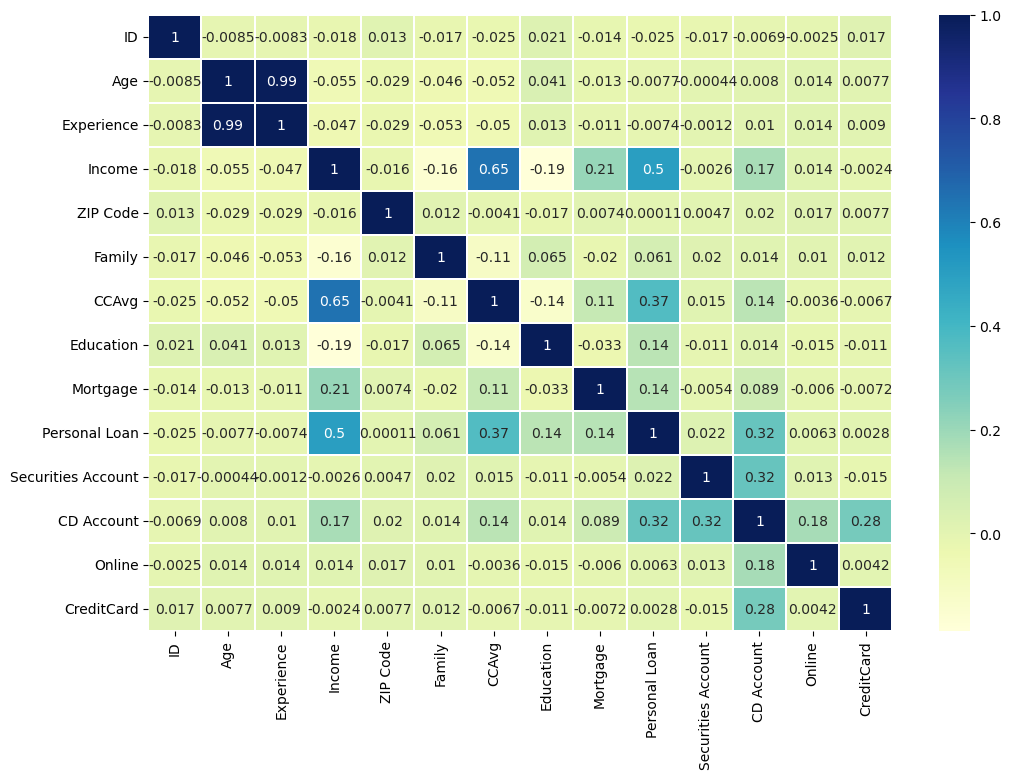

In [17]:
plt.figure(figsize=(12, 8)) 
sns.heatmap(data.corr(), cmap="YlGnBu",  linewidths=.2,annot = True)

In [18]:
from sklearn.linear_model import LinearRegression


# Split the data into input and output variables
X = data[['Income', 'CD Account', 'Mortgage']] # Features
y = data['Personal Loan'] # Target variable

# Create a Linear Regression model object
model = LinearRegression()

# Fit the model using the input and output data
model.fit(X, y)

# Print the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [2.92387934e-03 2.92386518e-01 7.67562875e-05]
Intercept: -0.14170364314961262


In [19]:
# Drop irrelevant columns
data = data.drop(['ID', 'ZIP Code'], axis=1)

# Drop rows with null values
data = data.dropna()

# Convert categorical variables into numerical variables
data['Education'] = pd.Categorical(data['Education'])
data['Education'] = data['Education'].cat.codes
data['Personal Loan'] = pd.Categorical(data['Personal Loan'])
data['Personal Loan'] = data['Personal Loan'].cat.codes
data['Securities Account'] = pd.Categorical(data['Securities Account'])
data['Securities Account'] = data['Securities Account'].cat.codes
data['CD Account'] = pd.Categorical(data['CD Account'])
data['CD Account'] = data['CD Account'].cat.codes
data['Online'] = pd.Categorical(data['Online'])
data['Online'] = data['Online'].cat.codes
data['CreditCard'] = pd.Categorical(data['CreditCard'])
data['CreditCard'] = data['CreditCard'].cat.codes


In [20]:
data.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,0.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,2.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,2.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


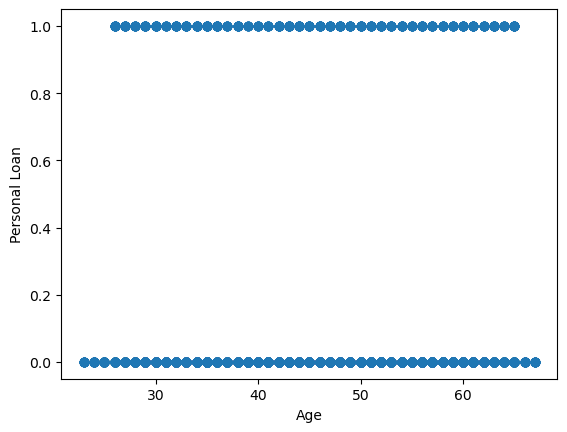

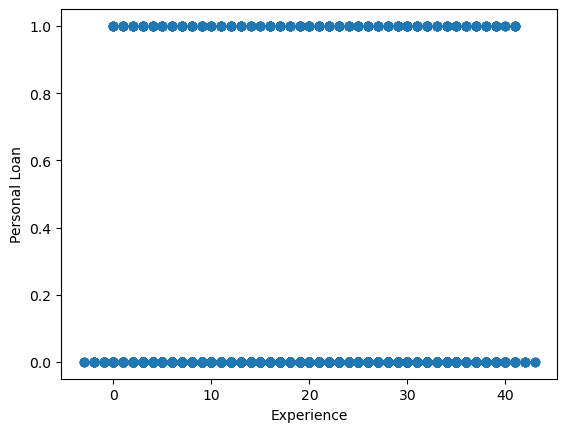

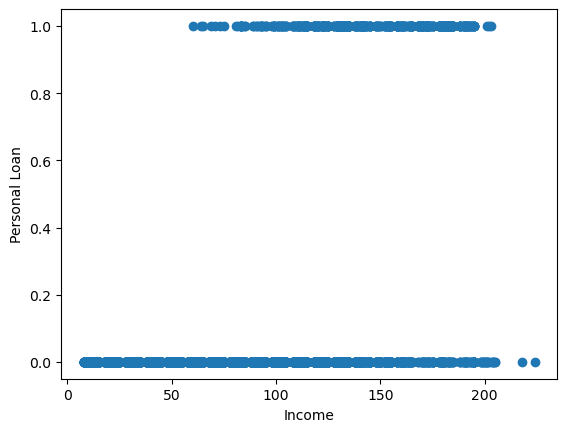

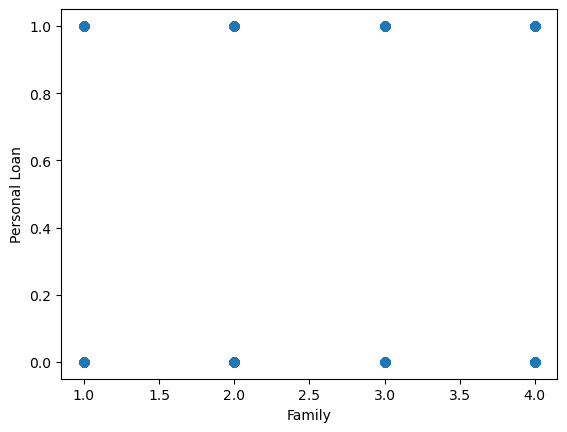

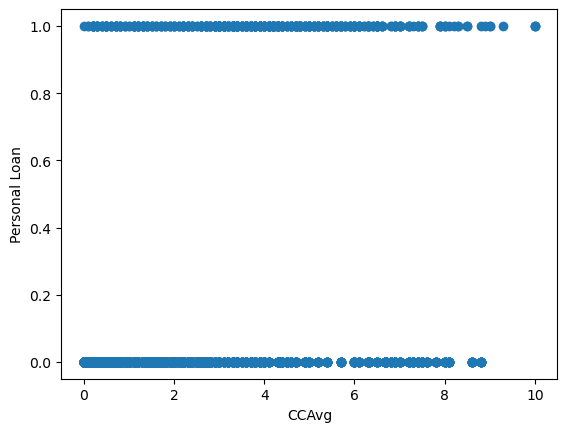

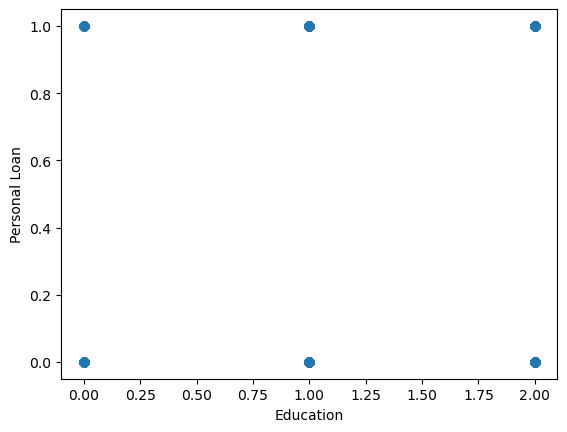

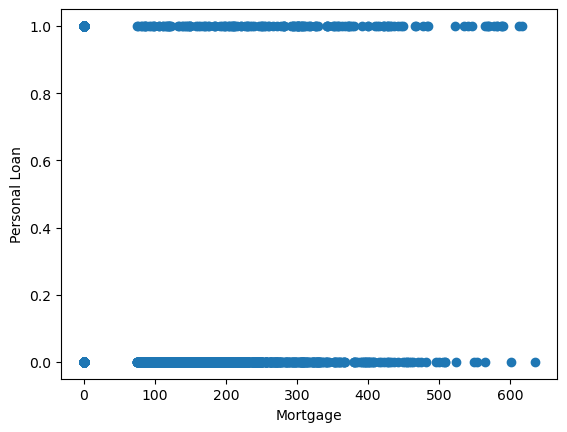

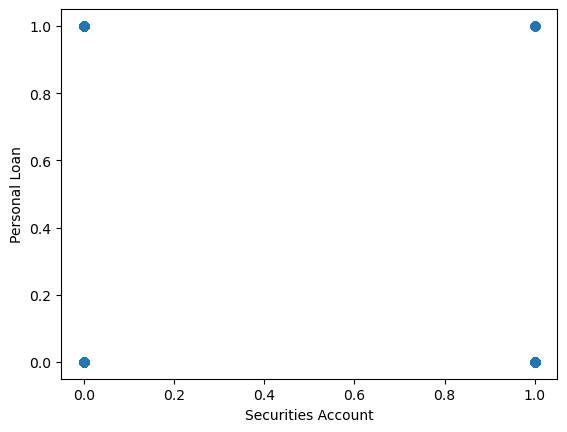

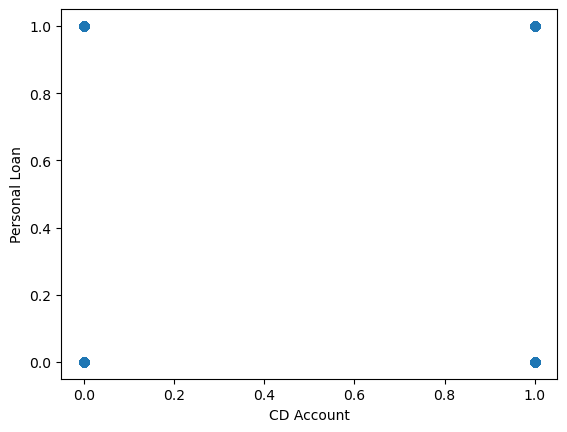

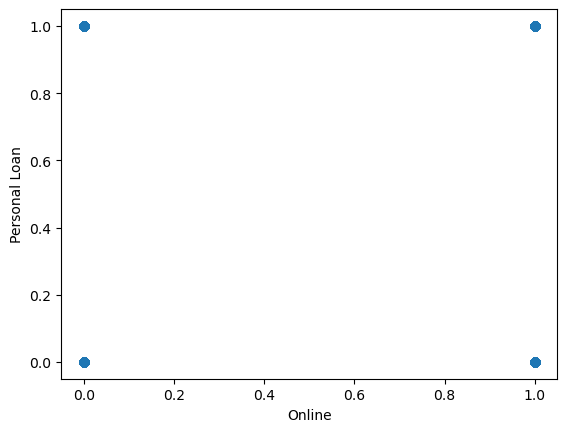

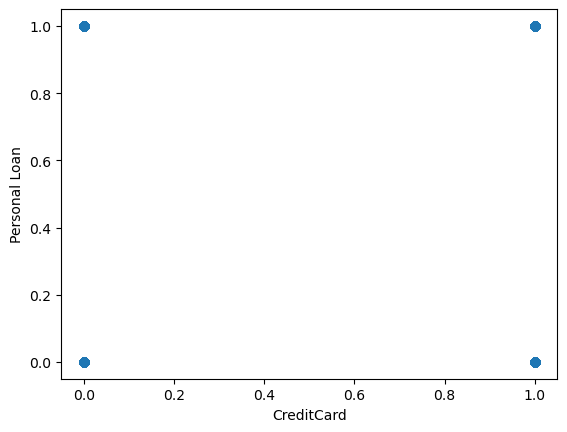

In [21]:
# Plot scatter plots
for col in data.columns:
    if col != 'Personal Loan':
        plt.scatter(data[col], data['Personal Loan'])
        plt.xlabel(col)
        plt.ylabel('Personal Loan')
        plt.show()

In [22]:
#%% replace negative values with 0 because they are effectiveless

data["Experience"].replace((-3,-2,-1),(0,0,0), inplace=True)

In [23]:
data.describe()


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.119600,73.774200,2.396400,1.937938,0.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.440484,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,0.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,2.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,2.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [24]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
# X values
x_data = data.drop(["Securities Account", "CD Account", "Online", "CreditCard"], axis=1)

# Normalization
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

# Y value
y = data["Personal Loan"]

# Train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=19)

# Define models
models = [DecisionTreeClassifier(random_state=19),
          RandomForestClassifier(random_state=19),
          GradientBoostingClassifier(random_state=19, n_estimators=500, learning_rate=0.01),
          KNeighborsClassifier(),
          SVC(),
          GaussianNB()]

# Process all
for model in models:
    model.fit(x_train, y_train)

    # Find y_pred
    y_pred = model.predict(x_test)

    # Score
    score = model.score(x_test, y_test)
    
    print("_" * 50)
    print(str(model))
    print(f"score : {score}")


/Users/piyushashinde/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/piyushashinde/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/piyushashinde/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


__________________________________________________
DecisionTreeClassifier(random_state=19)
score : 1.0
__________________________________________________
RandomForestClassifier(random_state=19)
score : 1.0
__________________________________________________
GradientBoostingClassifier(learning_rate=0.01, n_estimators=500,
                           random_state=19)
score : 1.0
__________________________________________________
KNeighborsClassifier()
score : 1.0
__________________________________________________
SVC()
score : 1.0
__________________________________________________
GaussianNB()
score : 1.0


/Users/piyushashinde/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/piyushashinde/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

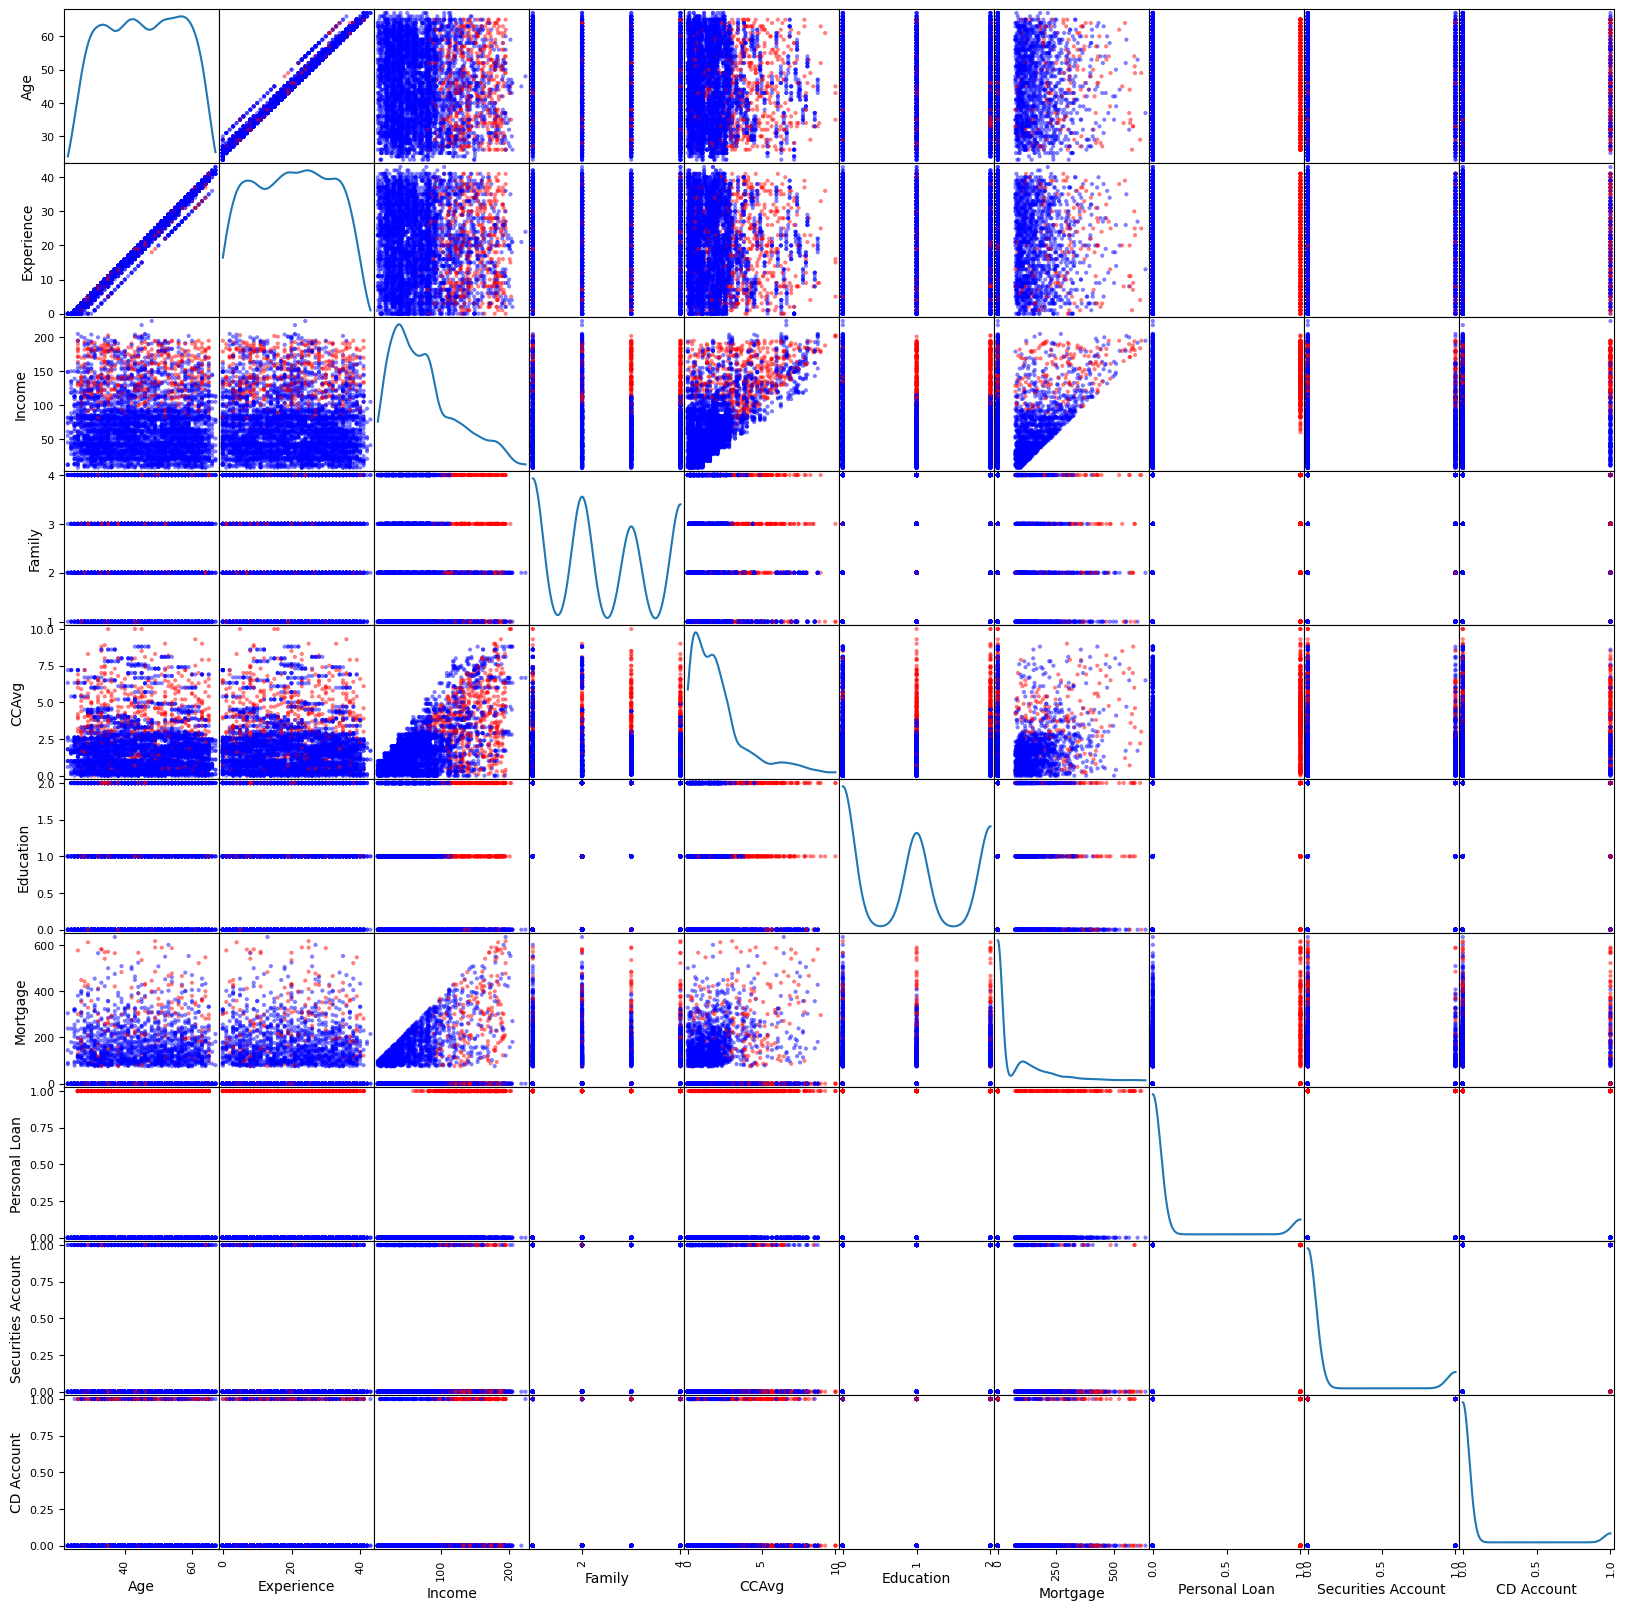

In [25]:
#To check the relations between each variables
pd.plotting.scatter_matrix(data.drop(["Online", "CreditCard"], axis=1), figsize=(20,20), diagonal='kde', c=data["Personal Loan"], cmap='bwr')

plt.show()


Coefficients: [-0.00042521  0.02471891]
Intercept: 0.13834422461353446
R-squared Score: 0.417881129271633


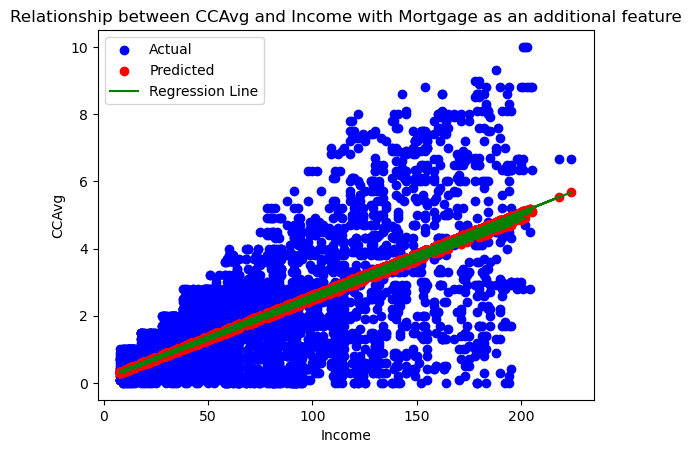

In [26]:
from sklearn.metrics import r2_score
# Split the data into input and output variables
X = data[['Mortgage', 'Income']] # Features
y = data['CCAvg'] # Target variable

# Create a Linear Regression model object
model = LinearRegression()

# Fit the model using the input and output data
model.fit(X, y)

# Predict the output variable using the input data
y_pred = model.predict(X)

# Calculate the R-squared score
r2 = r2_score(y, y_pred)

# Print the coefficients, intercept, and R-squared score
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('R-squared Score:', r2)

# Create a scatter plot of the data with the regression line
plt.scatter(X['Income'], y, color='blue', label='Actual')
plt.scatter(X['Income'], y_pred, color='red', label='Predicted')
plt.plot(X['Income'], y_pred, color='green', label='Regression Line')
plt.title('Relationship between CCAvg and Income with Mortgage as an additional feature')
plt.xlabel('Income')
plt.ylabel('CCAvg')
plt.legend()
plt.show()

/Users/piyushashinde/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


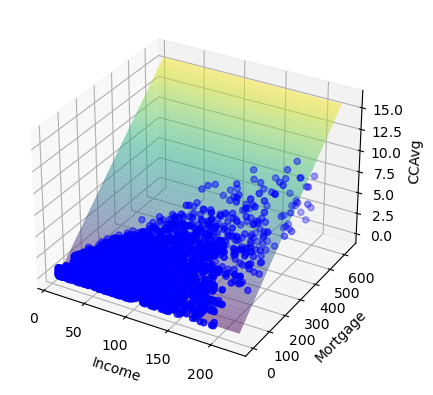

In [39]:
from mpl_toolkits import mplot3d

# Create a 3D scatter plot of the data
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X['Income'], X['Mortgage'], y, color='blue')

# Create a meshgrid of CCAvg and Mortgage values
ccavg_grid, mortgage_grid = np.meshgrid(np.linspace(X['Income'].min(), X['Income'].max(), 100),
                                        np.linspace(X['Mortgage'].min(), X['Mortgage'].max(), 100))

# Predict the output variable for the meshgrid data
y_pred = model.predict(pd.DataFrame({'Income': ccavg_grid.ravel(), 'Mortgage': mortgage_grid.ravel()}))
y_pred = y_pred.reshape(ccavg_grid.shape)

# Plot the linear regression plane
ax.plot_surface(ccavg_grid, mortgage_grid, y_pred, alpha=0.5, cmap='viridis')
ax.set_xlabel('Income')
ax.set_ylabel('Mortgage')
ax.set_zlabel('CCAvg')
plt.show()


Conclusion : Different visualizations performed in this dataaset to understand the relation between target variable and features. The linear regression fits well with inccome, CCAVg and mortgae values giving linear relation between target and features